In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [166]:
y=train['Sales']
x=train.drop(['Sales'],axis=1)


In [167]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33)

In [ ]:
train.groupby Sales

<AxesSubplot:xlabel='Outlet_Location_Type'>

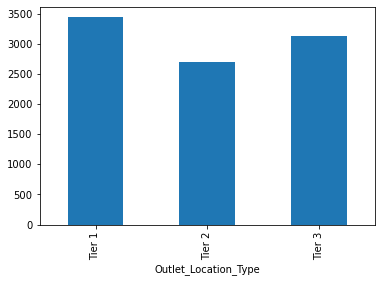

In [26]:
train.groupby('Outlet_Location_Type')['Sales'].first().plot(kind='bar')

<AxesSubplot:xlabel='Outlet_Size'>

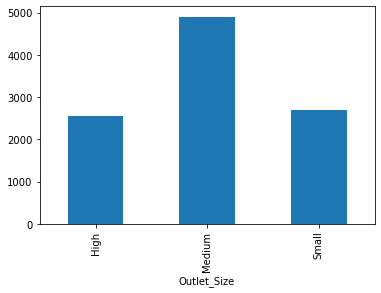

In [24]:
train.groupby('Outlet_Size')['Sales'].first().plot(kind='bar')

In [ ]:
A summary of the important business outcomes /real life impact


In [22]:
train.groupby('Item_Type')['Sales'].first()

Item_Type
Baking Goods             2689.457781
Breads                    581.887837
Breakfast                3427.886505
Canned                   1831.108778
Dairy                     207.274752
Frozen Foods             2096.232294
Fruits and Vegetables    2815.387889
Hard Drinks              3129.967268
Health and Hygiene       1998.508351
Household                1363.729399
Meat                     3437.350375
Others                    730.148977
Seafood                  1036.315430
Snack Foods              1636.772708
Soft Drinks              2635.750407
Starchy Foods            1306.514376
Name: Sales, dtype: float64

In [3]:
train

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829
...,...,...,...,...,...,...,...,...,...
87859,FDG24,9.994412,Breakfast,147.389893,OUT035,1987,Medium,Tier 3,4975.646052
87860,FDA32,11.259252,Canned,127.965666,OUT049,1987,Medium,Tier 2,2252.492755
87861,FDM04,11.385812,Household,119.028901,OUT018,1997,Medium,Tier 1,2716.058050
87862,NCS18,18.018028,Household,223.416318,OUT018,1988,Medium,Tier 3,991.857233


<AxesSubplot:>

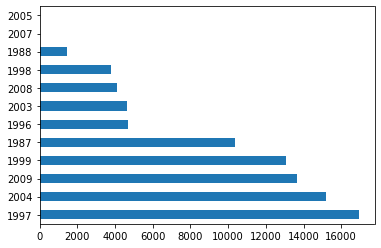

In [18]:
train['Outlet_Year'].value_counts().plot(kind='barh')

<AxesSubplot:>

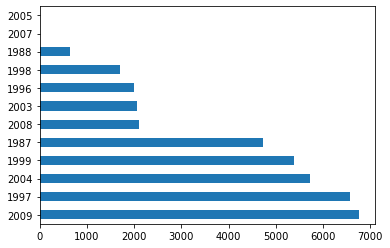

In [19]:
test['Outlet_Year'].value_counts().plot(kind='barh')

In [6]:
train['Outlet_Size'].unique()

array(['Small', 'Medium', 'High'], dtype=object)

In [7]:
train['Outlet_Location_Type'].unique()

array(['Tier 2', 'Tier 1', 'Tier 3'], dtype=object)

In [8]:
train['Item_Type'].unique()

array(['Baking Goods', 'Meat', 'Hard Drinks', 'Starchy Foods', 'Breads',
       'Others', 'Seafood', 'Fruits and Vegetables', 'Soft Drinks',
       'Household', 'Snack Foods', 'Frozen Foods', 'Health and Hygiene',
       'Canned', 'Dairy', 'Breakfast'], dtype=object)

In [9]:
train['Item_ID'].unique()

array(['FDU32', 'NCT54', 'FDW08', 'FDJ22', 'FDF47', 'DRK12', 'FDA32',
       'FDH24', 'FDW03', 'FDE11', 'FDQ40', 'FDF56', 'FDC58', 'FDG32',
       'FDS55', 'FDN46', 'NCY17', 'FDP40', 'FDS35', 'FDY40', 'DRL01',
       'FDY27', 'FDW28', 'FDX09', 'NCI54', 'FDR34', 'FDF08', 'NCK05',
       'FDG21', 'FDT34', 'DRI47', 'FDQ21', 'FDO32', 'FDJ04', 'NCT41',
       'FDM08', 'FDN21', 'FDQ31', 'FDS04', 'FDS34', 'FDK60', 'FDZ49',
       'FDA43', 'DRJ51', 'NCL05', 'NCA17', 'FDL38', 'FDS16', 'FDC41',
       'FDU55', 'DRF25', 'NCB31', 'FDO09', 'FDP25', 'FDE14', 'NCG42',
       'FDD40', 'FDX36', 'FDU12', 'FDM04', 'FDV26', 'FDL50', 'FDJ60',
       'DRF01', 'FDE41', 'FDW52', 'NCL31', 'FDC35', 'FDZ45', 'FDZ58',
       'DRD25', 'FDS49', 'FDQ23', 'NCW54', 'FDI19', 'FDX23', 'FDL25',
       'DRL11', 'FDX45', 'FDP52', 'FDD21', 'NCO41', 'NCJ54', 'NCP17',
       'FDR35', 'FDP16', 'FDI07', 'FDL44', 'FDH60', 'FDV55', 'FDD52',
       'DRK49', 'FDI15', 'FDR26', 'DRN47', 'DRF49', 'FDI14', 'FDB23',
       'FDW48', 'NCR

In [10]:
train['Outlet_ID'].unique()

array(['OUT046', 'OUT035', 'OUT049', 'OUT018', 'OUT013'], dtype=object)

In [11]:
train.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

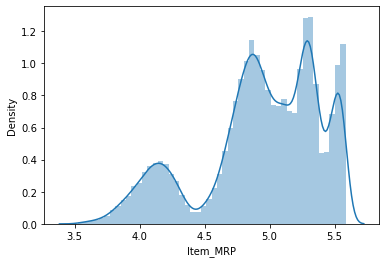

In [22]:
a= np.log(train['Item_MRP']+1)
sns.distplot(a)

<AxesSubplot:xlabel='Item_W', ylabel='Density'>

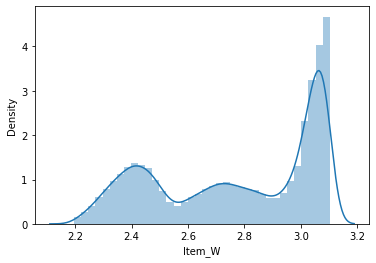

In [23]:
a= np.log(train['Item_W']+1)
sns.distplot(a)

<AxesSubplot:xlabel='Item_W', ylabel='Density'>

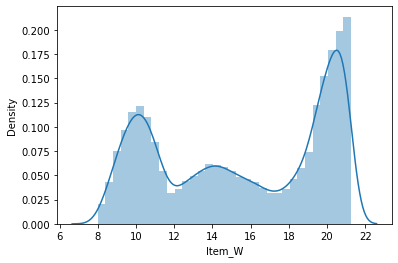

In [24]:
sns.distplot(train['Item_W'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

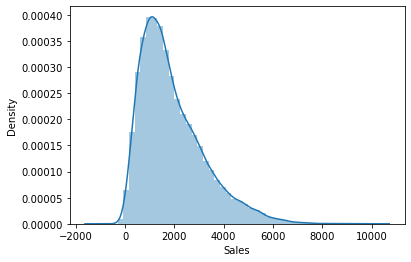

In [4]:
sns.distplot(train['Sales'])

<AxesSubplot:>

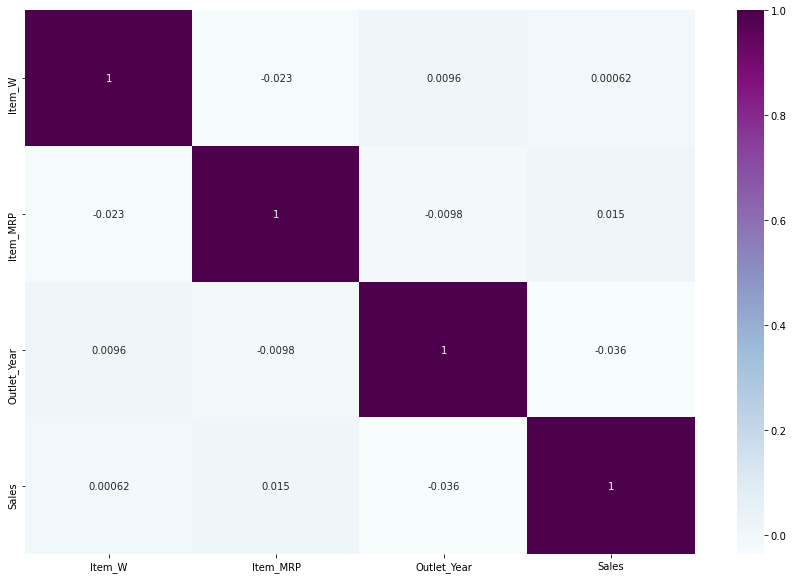

In [26]:
corr = train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [29]:
b=train['Item_ID'].value_counts()
len(b)

895

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               87864 non-null  object 
 1   Item_W                87864 non-null  float64
 2   Item_Type             87864 non-null  object 
 3   Item_MRP              87864 non-null  float64
 4   Outlet_ID             87864 non-null  object 
 5   Outlet_Year           87864 non-null  int64  
 6   Outlet_Size           87864 non-null  object 
 7   Outlet_Location_Type  87864 non-null  object 
 8   Sales                 87864 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.0+ MB


In [168]:

cols = ['Item_ID',"Item_Type","Outlet_ID",'Outlet_Size',"Outlet_Location_Type",'Outlet_Year']
le = LabelEncoder()
for col in cols:
    X_train[col] = le.fit_transform(X_train[col])

In [169]:
sts = MaxAbsScaler()

In [170]:
feature_scale = ['Item_W','Item_MRP']
X_train[feature_scale]=sts.fit_transform(X_train[feature_scale])

In [171]:
cols = ['Item_ID',"Item_Type","Outlet_ID",'Outlet_Size',"Outlet_Location_Type",'Outlet_Year']
le = LabelEncoder()
for col in cols:
    X_valid[col] = le.fit_transform(X_valid[col])

In [172]:
sts = MaxAbsScaler()

In [173]:
feature_scale = ['Item_W','Item_MRP']
X_valid[feature_scale]=sts.fit_transform(X_valid[feature_scale])

In [158]:
test

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,73,0.477964,13,0.449904,0,5,0,2
1,237,0.491032,9,0.993928,1,0,0,2
2,376,0.562522,8,0.928646,1,3,0,0
3,709,0.703461,4,0.513556,3,7,1,1
4,143,0.521414,3,0.652861,1,11,1,2
...,...,...,...,...,...,...,...,...
37651,683,0.300235,4,0.672425,1,11,1,2
37652,316,0.312941,3,0.565865,1,11,1,2
37653,21,0.266118,14,0.556200,3,3,2,0
37654,492,0.314118,13,0.350462,1,11,1,2


In [197]:
X_train

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
29481,663,0.717797,0,0.429671,2,4,2,2
66614,117,0.905159,9,0.209715,0,0,1,2
57302,657,0.506191,6,0.910297,4,11,1,2
70114,86,0.520883,3,0.623385,2,8,2,1
56006,146,0.660106,6,0.449082,4,7,1,2
...,...,...,...,...,...,...,...,...
8038,19,0.948948,11,0.241739,2,3,1,0
29824,254,0.487661,0,0.552346,3,2,2,1
54386,506,0.546658,6,0.450694,4,7,0,0
74621,373,0.522753,13,0.605350,3,0,2,0


In [150]:
train

Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
FDU32,21.0275,Baking Goods,197.352,OUT046,2004,Small,Tier 2,2689.46
NCT54,21.1024,Meat,148.25,OUT035,1987,Small,Tier 1,3437.35
FDW08,20.8823,Hard Drinks,205.465,OUT035,1999,Small,Tier 3,3129.97
FDJ22,21.0504,Starchy Foods,253.418,OUT046,1996,Small,Tier 1,1306.51
FDF47,21.2479,Baking Goods,240.871,OUT035,1988,Small,Tier 3,1739.77
DRK12,20.9564,Baking Goods,130.265,OUT049,1999,Small,Tier 1,1963.63
FDA32,21.1966,Breads,239.26,OUT035,1999,Small,Tier 2,581.888
FDH24,20.9493,Hard Drinks,167.267,OUT046,1997,Small,Tier 2,679.055
FDW03,20.8848,Baking Goods,185.454,OUT049,1997,Small,Tier 1,1991.32
FDE11,21.1836,Others,239.191,OUT018,2009,Small,Tier 1,730.149


In [179]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.layers import Dense, BatchNormalization
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [194]:
y=pd.DataFrame(y)
x=pd.DataFrame(x)


In [205]:
print ('Building model starts.....')

inputs = Input(shape=(1, 8))
LSTM_1 =LSTM(6,activation='tanh', return_sequences=True, name = 'LSTM_1')(inputs)
output = LSTM(1, activation='tanh', return_sequences=False, name = 'latent_data')(LSTM_1)


autoencoder = Model(inputs= inputs,
                    outputs = output)


print ('Building model ends.....\n')

Building model starts.....
Building model ends.....



In [206]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1, 8)]            0         
_________________________________________________________________
LSTM_1 (LSTM)                (None, 1, 6)              360       
_________________________________________________________________
latent_data (LSTM)           (None, 1)                 32        
Total params: 392
Trainable params: 392
Non-trainable params: 0
_________________________________________________________________


In [198]:
X_train=X_train.to_numpy()
X_train=X_train.reshape(58868,1,8)

In [199]:
X_train.shape

(58868, 1, 8)

In [207]:
autoencoder.compile(optimizer = 'adam', loss = 'mse')

In [208]:
print ('Fitting model starts.....') 
keras.backend.set_value(autoencoder.optimizer.lr, 1e-5)

Fitting model starts.....


In [209]:
history = autoencoder.fit(x = X_train, 
                          y = y_train, 
                          epochs = 20, 
#                           batch_size=10,
                          verbose=1,
                          validation_split =0.1)
print ('Fitting model ends.....\n')

Epoch 1/20
1656/1656 [==============================] - 4s 1ms/step - loss: 5358965.0000 - val_loss: 5265744.5000
Epoch 2/20
1656/1656 [==============================] - 2s 1ms/step - loss: 5358872.5000 - val_loss: 5265680.5000
Epoch 3/20
1656/1656 [==============================] - 2s 1ms/step - loss: 5358803.0000 - val_loss: 5265563.0000
Epoch 4/20
1656/1656 [==============================] - 2s 1ms/step - loss: 5358402.0000 - val_loss: 5265142.5000
Epoch 5/20
1656/1656 [==============================] - 2s 1ms/step - loss: 5358117.5000 - val_loss: 5264560.0000
Epoch 6/20
1656/1656 [==============================] - 2s 1ms/step - loss: 5357633.5000 - val_loss: 5264415.0000
Epoch 7/20
1656/1656 [==============================] - 2s 1ms/step - loss: 5357512.0000 - val_loss: 5264323.0000
Epoch 8/20
1656/1656 [==============================] - 2s 1ms/step - loss: 5357437.0000 - val_loss: 5264244.5000
Epoch 9/20
1656/1656 [==============================] - 2s 1ms/step - loss: 5357357.5000

In [77]:
x=train.drop(['Sales'],axis=1)
y=train['Sales']

In [90]:
model = DecisionTreeRegressor()
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [91]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [92]:
model.score(X_train,y_train)

1.0

In [93]:
model.score(X_valid,y_valid)

-1.052735356060309

In [94]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    legend = plt.legend(loc = "upper right",fontsize = "medium")
    plt.xlabel('no. of entries')
    plt.ylabel('Loan sanctitioned USD')
    
    plt.show()
    plt.close()

In [97]:
y_predicted2=model.predict(X_valid)

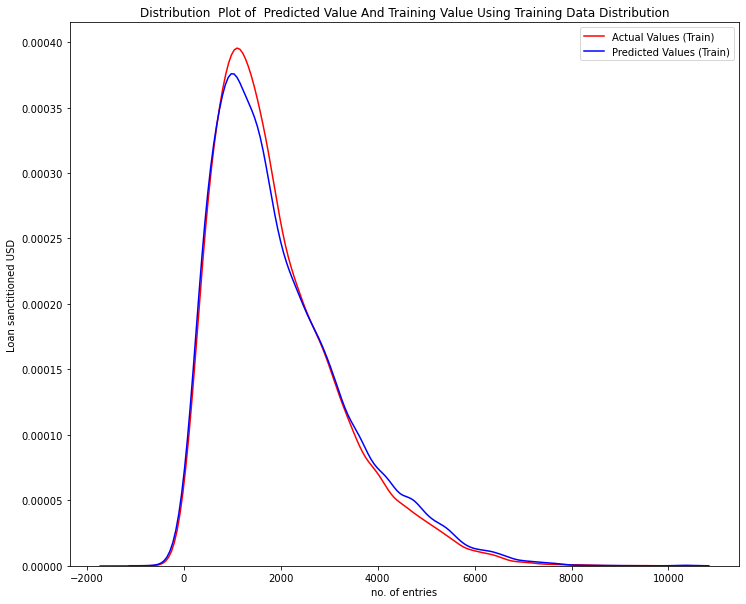

In [98]:
Title = 'Distribution  Plot of  Predicted Value And Training Value Using Training Data Distribution'
DistributionPlot(y_valid, y_predicted2, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [103]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.1+12-LTS-39, mixed mode, sharing)
  Starting server from C:\ProgramData\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ayush\AppData\Local\Temp\tmphvr7wyfk
  JVM stdout: C:\Users\Ayush\AppData\Local\Temp\tmphvr7wyfk\h2o_Ayush_started_from_python.out
  JVM stderr: C:\Users\Ayush\AppData\Local\Temp\tmphvr7wyfk\h2o_Ayush_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_Ayush_wi4uv5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.848 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [104]:
data_path=r'train.csv'

In [105]:
df=h2o.import_file(data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [106]:
df

Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
FDU32,21.0275,Baking Goods,197.352,OUT046,2004,Small,Tier 2,2689.46
NCT54,21.1024,Meat,148.25,OUT035,1987,Small,Tier 1,3437.35
FDW08,20.8823,Hard Drinks,205.465,OUT035,1999,Small,Tier 3,3129.97
FDJ22,21.0504,Starchy Foods,253.418,OUT046,1996,Small,Tier 1,1306.51
FDF47,21.2479,Baking Goods,240.871,OUT035,1988,Small,Tier 3,1739.77
DRK12,20.9564,Baking Goods,130.265,OUT049,1999,Small,Tier 1,1963.63
FDA32,21.1966,Breads,239.26,OUT035,1999,Small,Tier 2,581.888
FDH24,20.9493,Hard Drinks,167.267,OUT046,1997,Small,Tier 2,679.055
FDW03,20.8848,Baking Goods,185.454,OUT049,1997,Small,Tier 1,1991.32
FDE11,21.1836,Others,239.191,OUT018,2009,Small,Tier 1,730.149


In [120]:
y='Sales'
x=df.columns

In [108]:
aml = H2OAutoML(max_models=20,seed=1)
aml.train(x=x,y=y,training_frame=df)

AutoML progress: |
12:17:58.673: AutoML: XGBoost is not available; skipping it.
12:17:58.703: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
12:17:58.704: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_6_AutoML_1_20211107_121758

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1429674.7941146295
RMSE: 1195.6900911668665
MAE: 944.6856199327069
RMSLE: NaN
R^2: 0.1318113537286738
Mean Residual Deviance: 1429674.7941146295
Null degrees of freedom: 9936
Residual degrees of freedom: 9928
Null deviance: 16364838839.298325
Residual deviance: 14206678429.117073
AIC: 169056.66367934982

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 1634221.598826429

In [119]:
lb = aml.leaderboard
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_6_AutoML_1_20211107_121758,1.63422e+06,1278.37,1.63422e+06,1002.49,nan
StackedEnsemble_AllModels_3_AutoML_1_20211107_121758,1.63454e+06,1278.49,1.63454e+06,1002.32,nan
StackedEnsemble_AllModels_4_AutoML_1_20211107_121758,1.63455e+06,1278.49,1.63455e+06,1002.42,nan
StackedEnsemble_AllModels_2_AutoML_1_20211107_121758,1.63627e+06,1279.17,1.63627e+06,1002.99,nan
StackedEnsemble_BestOfFamily_3_AutoML_1_20211107_121758,1.63628e+06,1279.17,1.63628e+06,1003.01,nan
StackedEnsemble_AllModels_5_AutoML_1_20211107_121758,1.63683e+06,1279.39,1.63683e+06,1003.27,nan
StackedEnsemble_BestOfFamily_4_AutoML_1_20211107_121758,1.63776e+06,1279.75,1.63776e+06,1003.35,nan
StackedEnsemble_BestOfFamily_5_AutoML_1_20211107_121758,1.63777e+06,1279.75,1.63777e+06,1003.35,nan
StackedEnsemble_BestOfFamily_7_AutoML_1_20211107_121758,1.63785e+06,1279.78,1.63785e+06,1003.57,nan
StackedEnsemble_BestOfFamily_6_AutoML_1_20211107_121758,1.64093e+06,1280.99,1.64093e+06,1004.34,nan


In [111]:
#get model ids for all models in automl leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [112]:
#get the All models styacked ensemble model
se = h2o.get_model([mid for mid in model_ids if 'StackedEnsemble_AllModels' in mid][0])

In [113]:
metalearner = h2o.get_model(se.metalearner()['name'])

C:\ProgramData\Anaconda3\lib\site-packages\h2o\estimators\stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [114]:
metalearner.coef_norm()

{'Intercept': 1911.8421198060094,
 'DeepLearning_grid_2_AutoML_1_20211107_121758_model_1': 17.60235952788741,
 'DeepLearning_1_AutoML_1_20211107_121758': 31.0280786925044,
 'DeepLearning_grid_3_AutoML_1_20211107_121758_model_1': 12.567845183922442,
 'DeepLearning_grid_1_AutoML_1_20211107_121758_model_1': 23.950451079232565,
 'GBM_grid_1_AutoML_1_20211107_121758_model_3': 0.0,
 'DeepLearning_grid_1_AutoML_1_20211107_121758_model_2': 0.9822508569842342,
 'GBM_grid_1_AutoML_1_20211107_121758_model_4': 51.15314738631834,
 'GBM_1_AutoML_1_20211107_121758': 35.38223109390967,
 'XRT_1_AutoML_1_20211107_121758': 33.387251718323135,
 'DeepLearning_grid_3_AutoML_1_20211107_121758_model_2': 0.0,
 'GBM_3_AutoML_1_20211107_121758': 0.0,
 'GBM_grid_1_AutoML_1_20211107_121758_model_2': 0.0,
 'DeepLearning_grid_2_AutoML_1_20211107_121758_model_2': 0.0,
 'GBM_2_AutoML_1_20211107_121758': 0.0,
 'GLM_1_AutoML_1_20211107_121758': 0.0,
 'GBM_5_AutoML_1_20211107_121758': 0.0,
 'GBM_grid_1_AutoML_1_20211107_

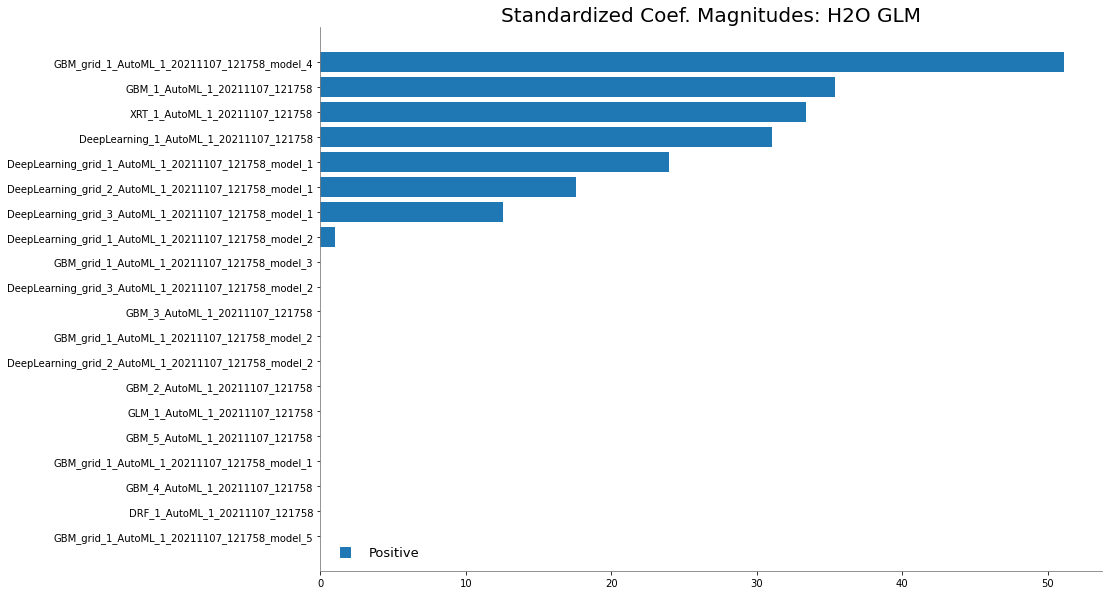

In [115]:
%matplotlib inline
metalearner.std_coef_plot()

In [122]:
train = h2o.import_file("train.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [128]:
train

Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
FDU32,21.0275,Baking Goods,197.352,OUT046,2004,Small,Tier 2,2689.46
NCT54,21.1024,Meat,148.25,OUT035,1987,Small,Tier 1,3437.35
FDW08,20.8823,Hard Drinks,205.465,OUT035,1999,Small,Tier 3,3129.97
FDJ22,21.0504,Starchy Foods,253.418,OUT046,1996,Small,Tier 1,1306.51
FDF47,21.2479,Baking Goods,240.871,OUT035,1988,Small,Tier 3,1739.77
DRK12,20.9564,Baking Goods,130.265,OUT049,1999,Small,Tier 1,1963.63
FDA32,21.1966,Breads,239.26,OUT035,1999,Small,Tier 2,581.888
FDH24,20.9493,Hard Drinks,167.267,OUT046,1997,Small,Tier 2,679.055
FDW03,20.8848,Baking Goods,185.454,OUT049,1997,Small,Tier 1,1991.32
FDE11,21.1836,Others,239.191,OUT018,2009,Small,Tier 1,730.149


In [132]:
y=train['Sales']
x=train.columns
x.remove(y)
X=train[x]

In [133]:
X

Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
21.0275,Baking Goods,197.352,OUT046,2004,Small,Tier 2,2689.46
21.1024,Meat,148.25,OUT035,1987,Small,Tier 1,3437.35
20.8823,Hard Drinks,205.465,OUT035,1999,Small,Tier 3,3129.97
21.0504,Starchy Foods,253.418,OUT046,1996,Small,Tier 1,1306.51
21.2479,Baking Goods,240.871,OUT035,1988,Small,Tier 3,1739.77
20.9564,Baking Goods,130.265,OUT049,1999,Small,Tier 1,1963.63
21.1966,Breads,239.26,OUT035,1999,Small,Tier 2,581.888
20.9493,Hard Drinks,167.267,OUT046,1997,Small,Tier 2,679.055
20.8848,Baking Goods,185.454,OUT049,1997,Small,Tier 1,1991.32
21.1836,Others,239.191,OUT018,2009,Small,Tier 1,730.149


In [135]:
p=aml.predict(X)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [139]:
p=pd.DataFrame(p)

In [140]:
p=p.to_numpy()

In [142]:
y=pd.DataFrame(y)
y=y.to_numpy()

In [147]:
type(p)

numpy.ndarray

In [145]:
p

predict
2018.82
1958.02
2088.8
2008.09
1950.1
1982.34
2155.86
1993.84
2021.44
1874.74


array([[]], dtype=object)

ValueError: setting an array element with a sequence.

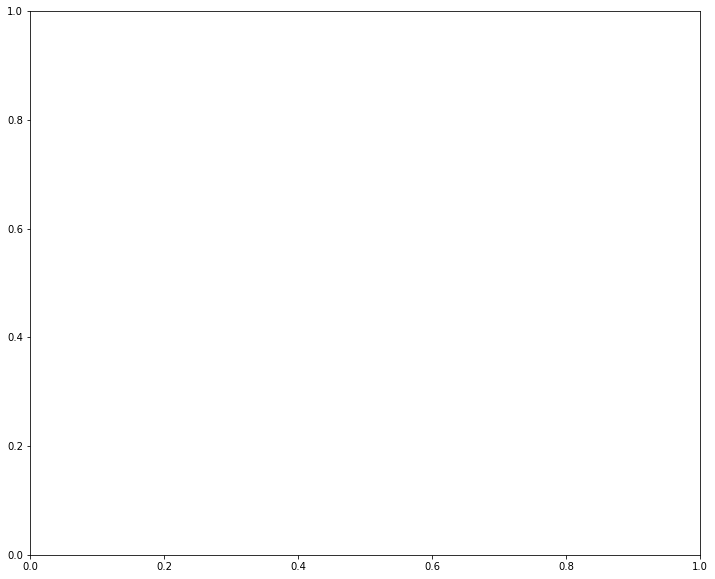

In [143]:
Title = 'Distribution  Plot of  Predicted Value And Training Value Using Training Data Distribution'
DistributionPlot(y, p, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [1]:
import pandas as pd
df = pd.read_csv('submission.csv')
df

,Sales
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
37651,0.0
37652,0.0
37653,0.0
37654,0.0
